In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.integrate as spi
plt.style.use('seaborn-white')
%matplotlib inline

In [11]:
filename = 'data/diff_lambdas_const_rh.csv'
df = pd.read_csv(filename)
df.head()

,DL,DLS,DS,M,numerical_thetas,om_lambdas,rs,rs_initial,step,theta
0,622.435157,74.071502,682.067348,1.432923e-07,0.00001,0.000000,837.918942,837.915984,5.000000e-07,0.00001
1,623.866125,74.403755,683.946236,1.403972e-07,0.00001,0.020204,840.021953,840.041344,5.000000e-07,0.00001
2,625.309897,74.740929,685.634525,1.375021e-07,0.00001,0.040408,842.177537,842.187615,5.000000e-07,0.00001
3,626.766685,75.081764,687.332579,1.346070e-07,0.00001,0.060612,844.354278,844.355181,5.000000e-07,0.00001
4,628.236710,75.428101,689.047965,1.317119e-07,0.00001,0.080816,846.553872,846.544435,5.000000e-07,0.00001


In [12]:
df.values[0]

array([  6.22435157e+02,   7.40715015e+01,   6.82067348e+02,
         1.43292288e-07,   1.00001449e-05,   0.00000000e+00,
         8.37918942e+02,   8.37915984e+02,   5.00000000e-07,
         1.00000000e-05])

In [13]:
# length_scale = 3.086e22
# H_0 = 7.56e-27 * length_scale
# M = 1474e12 / length_scale
# # print(M)
# print(4*M/201.990641/9.99960083e-06)
# Lambda = 3*0.726531*H_0**2
# print(Lambda*(201.990641*9.99960083e-06)**3/6/M)
# print(15*np.pi/4*M**2/(201.990641*9.99960083e-06)**2)

In [14]:
# # patch
# length_scale = 3.086e22
# H_0 = 7.56e-27 * length_scale
# M = 1474e12 / length_scale

# z_lens1 = np.linspace(0.05, 0.2, 100)
# z_lens2 = []
# for z in z_lens1:
#     z_lens2.extend([z]*50)

# # print(len(z_lens2), len(df.index))
# df['z_lens'] = z_lens2[:len(df.index)]

# def get_distances(z, Omega_Lambda=0):
#     Omega_m = 1 - Omega_Lambda
#     def integrand(z):
#         return 1/np.sqrt(Omega_m*(1+z)**3 + Omega_Lambda)
#     integral, error = spi.quad(integrand, 0, z)
#     comoving = integral/H_0
#     dang = comoving/(1+z)
#     return comoving, dang

# dang_lens = []
# for index, row in df.iterrows():
#     com, dang = get_distances(row.z_lens, row.om_lambdas)
#     dang_lens.append(dang)

# df['DL'] = dang_lens

In [15]:
# df = df[~((df.om_lambdas < 0.707144) & (df.om_lambdas > 0.707142))]

length_scale = 3.086e22
H_0 = 7.56e-27 * length_scale
# M = 1474e12 / length_scale

# def calc_theta(D_LS, D_L, D_S):
#     return np.sqrt(4*M*D_LS/D_L/D_S)

theta_second_order = []
theta_rindler = []
for index, row in df.iterrows():
    Lambda = 3*row.om_lambdas*H_0**2
    M = row.M
    rho = (1-row.om_lambdas)*3*H_0**2/(8*np.pi)
    r_h = (3*M/(4*np.pi*rho))**(1./3)
    

#     row.DLS*Lambda*row.DL**3/6/M,
#     coeff = [row.DLS*Lambda*row.DL**3/6/M, 0, row.DS, 0, -4*M*row.DLS/row.DL, -15*np.pi*M**2/4*row.DLS/row.DL**2, -305/12*M**3*row.DLS/row.DL**3]
    coeff = [row.DS + Lambda*row.DL*row.DLS*r_h/3, 0, -4*M*row.DLS/row.DL, -15*np.pi*M**2/4*row.DLS/row.DL**2, -305/12*M**3*row.DLS/row.DL**3]
#     if index < 50:
#         print(row.om_lambdas, 15*np.pi/4*M**2/(row.DL*row.theta)**2, Lambda*(row.DL*row.theta)*r_h/3)
    roots = np.roots(coeff)
    roots = roots[roots>0 & np.isreal(roots)]
    th = np.real(roots)
    rindler = th[np.argmin(np.abs(row.theta - th))]

    # coeff2 = [row.DS, -4*M*row.DLS/row.DL, 8*M**3*row.DLS/row.DL**3]
    coeff2 = [row.DS, 0, -4*M*row.DLS/row.DL, -15*np.pi*M**2/4*row.DLS/row.DL**2, -401/12*M**3*row.DLS/row.DL**3]
    roots2 = np.roots(coeff2)
    roots2 = roots2[roots2>0 & np.isreal(roots2)]
    th2 = np.real(roots2)
    second_order = th2[np.argmin(np.abs(row.theta - th2))]
    theta_rindler.append(rindler)
    theta_second_order.append(second_order)
    
#     if 990 < index < 1000:
#         calculated_ds = row.DLS*(4*M/(row.DL*rindler) + 15*np.pi*M**2/4/(row.DL*rindler)**2 + 305/12*M**3/(row.DL*rindler)**3 - Lambda*(row.DL*rindler)**3/6/M)/rindler
#         print(row.om_lambdas)
#         print(row.DS, calculated_ds)
#         print((rindler - row.theta)/row.theta)
#         print("==")

df['theta_second_order'] = theta_second_order
df['theta_rindler'] = theta_rindler


# ## removed percentage!!

df['percentage_diff'] = (df.theta_second_order - df.theta)/df.theta
df['rindler_preds'] = (df.theta_rindler - df.theta)/df.theta

# df['percentage_diff'] = (df.theta_second_order - df.theta)/df.theta*100
# df['percentage_diff'] = (df.rs - df.rs_initial)/df.rs_initial*100

In [16]:
df.head()

,DL,DLS,DS,M,numerical_thetas,om_lambdas,rs,rs_initial,step,theta,theta_second_order,theta_rindler,percentage_diff,rindler_preds
0,622.435157,74.071502,682.067348,1.432923e-07,0.00001,0.000000,837.918942,837.915984,5.000000e-07,0.00001,0.00001,0.00001,0.000048,0.000048
1,623.866125,74.403755,683.946236,1.403972e-07,0.00001,0.020204,840.021953,840.041344,5.000000e-07,0.00001,0.00001,0.00001,-0.000061,-0.000061
2,625.309897,74.740929,685.634525,1.375021e-07,0.00001,0.040408,842.177537,842.187615,5.000000e-07,0.00001,0.00001,0.00001,-0.000016,-0.000016
3,626.766685,75.081764,687.332579,1.346070e-07,0.00001,0.060612,844.354278,844.355181,5.000000e-07,0.00001,0.00001,0.00001,0.000028,0.000028
4,628.236710,75.428101,689.047965,1.317119e-07,0.00001,0.080816,846.553872,846.544435,5.000000e-07,0.00001,0.00001,0.00001,0.000078,0.000077


In [17]:
stats = df[['om_lambdas', 'percentage_diff', 'rindler_preds']].groupby('om_lambdas').agg(['mean', 'std', 'count'])
stats.columns = [' '.join(col).strip() for col in stats.columns.values]
stats['percentage_diff mean std'] = stats['percentage_diff std']/np.sqrt(stats['percentage_diff count'])
stats['rindler_preds mean std'] = stats['rindler_preds std']/np.sqrt(stats['rindler_preds count'])
stats

,percentage_diff mean,percentage_diff std,percentage_diff count,rindler_preds mean,rindler_preds std,rindler_preds count,percentage_diff mean std,rindler_preds mean std
om_lambdas,,,,,,,,
0.000000,2.547713e-05,0.000264,50,0.000025,0.000264,50,0.000037,0.000037
0.020204,-5.433825e-05,0.000309,50,-0.000055,0.000309,50,0.000044,0.000044
0.040408,1.508289e-05,0.000357,50,0.000015,0.000357,50,0.000050,0.000050
0.060612,1.277987e-05,0.000305,50,0.000012,0.000305,50,0.000043,0.000043
0.080816,1.676177e-05,0.000299,50,0.000016,0.000299,50,0.000042,0.000042
0.101020,-3.036974e-05,0.000318,50,-0.000031,0.000318,50,0.000045,0.000045
0.121224,-4.334796e-06,0.000321,50,-0.000006,0.000321,50,0.000045,0.000045
0.141429,6.073021e-05,0.000347,50,0.000059,0.000346,50,0.000049,0.000049
0.161633,-9.713312e-05,0.000305,50,-0.000099,0.000305,50,0.000043,0.000043


In [18]:
stats.values[0]

array([  2.54771302e-05,   2.64044436e-04,   5.00000000e+01,
         2.54769259e-05,   2.64044438e-04,   5.00000000e+01,
         3.73415222e-05,   3.73415225e-05])

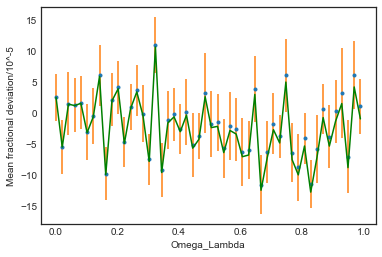

In [19]:
# from matplotlib import rc, rcParams
# rc('text', usetex=True)
# plt.rc('font', family='serif')
# %config InlineBackend.rc = {'figure.dpi': 600, 'savefig.dpi': 300, \
#                             'font.size': 30, \
#                             'figure.facecolor': (1, 1, 1, 0)}

scale = 1e-5
plt.plot(stats.index, stats['percentage_diff mean']/scale, '.')
plt.errorbar(stats.index, stats['percentage_diff mean']/scale, yerr=stats['percentage_diff mean std']/scale, linestyle='none')
plt.xlabel('Omega_Lambda')
plt.ylabel('Mean fractional deviation/10^-5')
plt.plot(stats.index, stats['rindler_preds mean']/scale, 'g-')
# plt.errorbar(stats.index, stats['rindler_preds mean']/scale, yerr=stats['rindler_preds mean std']/scale, linestyle='none')

# plt.xlabel(u"$\Omega_{\Lambda}$", size=14)
# plt.ylabel('Mean fractional deviation / $10^{-5}$', size=14)
# plt.savefig('images/diff_lambdas_const_rh.png', dpi=400)

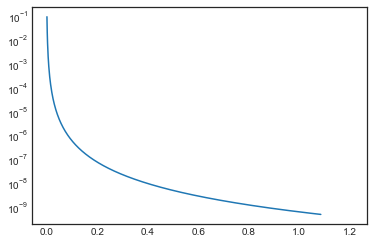

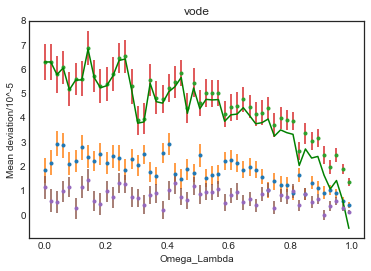

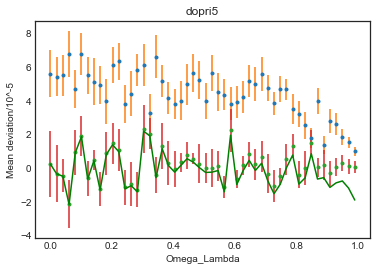

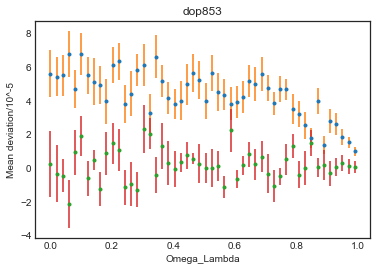

In [11]:
from util import plot_diff_lambdas
plt.figure()
plt.title("vode")
plot_diff_lambdas('data/diff_lambdas_small2.csv', recalculate_distances=True)
plot_diff_lambdas('data/diff_lambdas_step.csv', plot_rindler=True)
plot_diff_lambdas('data/diff_lambdas_step2.csv')
plt.figure()
plt.title("dopri5")
plot_diff_lambdas('data/dopri5_diff_lambdas.csv')
plot_diff_lambdas('data/dopri5_diff_lambdas2.csv', plot_rindler=True)
plt.figure()
plt.title("dop853")
plot_diff_lambdas('data/dop853_diff_lambdas.csv')
plot_diff_lambdas('data/dop853_diff_lambdas2.csv')

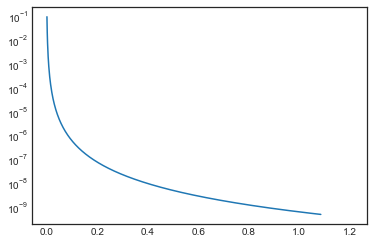

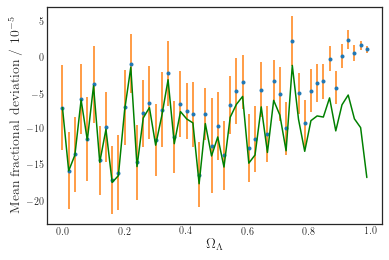

In [12]:
# configure plotting
import importlib
import util
util = importlib.reload(util)

from matplotlib import rc, rcParams
rc('text', usetex=True)
plt.rc('font', family='serif')
%config InlineBackend.rc = {'figure.dpi': 600, 'savefig.dpi': 300, \
                            'font.size': 30, \
                            'figure.facecolor': (1, 1, 1, 0)}
util.plot_diff_lambdas('data/diff_lambdas_bigger_redshifts2.csv', plot_rindler=True)
# ax = plt.gca()
plt.xlabel(u"$\Omega_{\Lambda}$", size=14)
plt.ylabel('Mean fractional deviation / $10^{-5}$', size=14)
# plt.legend()
# plt.savefig('images/fractional_deviations_const_M_without_rindler.png', dpi=400, transparent=True)